# Moringa Prep data Science Independent Project Week 4

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;
Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.


# Importing Our Libraries

In [ ]:
# Importing the Pandas Library
import pandas as pd

# Importing the Numpy Library
import numpy as np

# Loading Our Dataset

In [ ]:
# Let's read the data from the CSV file and create the dataframe to be used
# Let's also preview the first 5 rows of our data
path = '/content/Autolib_dataset (2).csv'
df = pd.read_csv(path)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


# Accessing Information about our Dataset

In [ ]:
# Let's get to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
# let us see the shape of our dataset
df.shape

(5000, 25)

# Cleaning our Dataset

We will clean our dataset using the steps below:

### Validity

In [ ]:
# Dropping the irrelevant columns in our dataset
# Explanation- we won't need these columns since they don’t fit under 
# the context of the problem we’re trying to solve and some of them are duplicated columns.
df.drop(['Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Geo point', 'Public name', 'Rental status', 'Scheduled at', 'Station type', 'Subscription status'], axis = 1, inplace = True)
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


In [ ]:
# Remove any syntax errors than we find in our dataset
# the code will remove any white spaces in our columns
df.columns = df.columns.str.strip()
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


Dropping Outliers

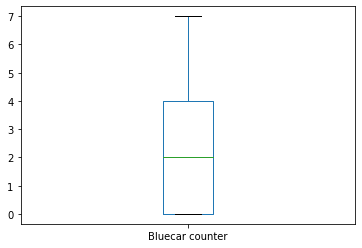

In [ ]:
# Let's plot a box plot to visualize any outliers in our bluecar counter column
df.boxplot(column =['Bluecar counter'], grid = False) 

#there are no outliers in our bluecar counter column

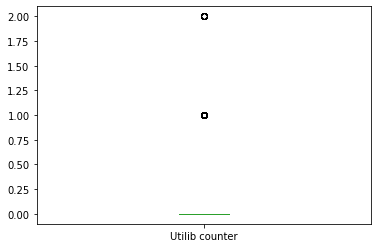

In [ ]:
# Let's plot a box plot to visualize any outliers in our Utilib counter column
df.boxplot(column =['Utilib counter'], grid = False) 

#there are some outliers in our bluecar counter column

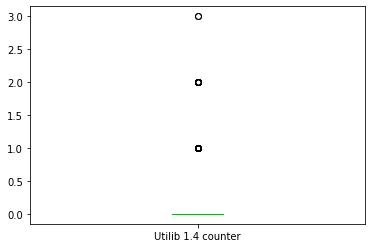

In [ ]:
# Let's plot a box plot to visualize any outliers in our Utilib 1.4 counter column
df.boxplot(column =['Utilib 1.4 counter'], grid = False) 

#there are some outliers in our bluecar counter column

Let us now drop these outliers. The IQR score uses the IQR scores to remove the outliers. 
The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

In [ ]:
# Calculating our first, third quantiles and then our IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
# and stores the result in the data frame 'df_out'
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df_out.shape)

# Printing the shape of our old dataset
print(df.shape)

(4210, 15)
(5000, 15)


### Completeness

In [ ]:
# Checking/ Counting Missing Values 
df_out.isnull().sum()

Address               0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
ID                    0
Kind                  0
Postal code           0
Slots                 0
Status                0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

### Consistency

In [ ]:
 # let's check for duplicates in our dataset and drop them
 df_out.duplicated().sum()

0

### Uniformity

In [ ]:
# Let's fix any mess in our column names
df_out.columns = df_out.columns.str.lower().str.replace(' ', '_')
df_out.head()

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,slots,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

# Renaming some column names
# 
df_out.rename(columns={'bluecar_counter':'bluecar', 'utilib_counter': 'utilib', 'utilib_1.4_counter':'utilib_1.4'}, inplace=True)
df_out
#df_out.rename(columns={'bluecar_counter':'bluecar', 'utilib_counter': 'utilib', 'utilib_1.4_counter':'utilib_1.4'})
#df_out


,address,bluecar,utilib,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


### Adding Relevant Columns for our Analysis

In [ ]:
# Date Type creation
# create a datetime object to hold the year, month, day, hour and minute together
df_out['datetime'] = pd.to_datetime(df_out[['year',	'month', 'day',	'hour',	'minute']])
df_out.head()

,address,bluecar,utilib,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20,2018-04-08 18:20:00


In [ ]:
# let's add usage columns for our cars(bluecar, utilib & utili 1.4)
# And preview our dataframe to confirm changes
df_out['bluecar_usage'] = df_out['bluecar'].diff()
df_out['utilib_usage'] = df_out['utilib'].diff()
df_out['utilib_1.4_usage'] = df_out['utilib_1.4'].diff()
df_out.head()
df_out.head()

,address,bluecar,utilib,utilib_1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,datetime,bluecar_usage,utilib_usage,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20,2018-04-08 18:20:00,0.0,0.0,0.0


The above cell can be explained in the following way:

positive no.-the car was returned

negative no.- the car was picked

zero - nothing happened

### Final Cleaning

In [ ]:
# Let's drop the year, month, day and minute column seince we already have this information in the datetime column
# we retain the hour column since it is needed to answer our research question
df_out.drop(['year', 'month', 'day', 'minute'], axis = 1, inplace = True)
df_out.head()

,address,bluecar,utilib,utilib_1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_usage,utilib_usage,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0


# Exporting the Cleaned Dataset

In [ ]:
# Having cleaned our data we are ready to now export it into a csv file
df_out.to_csv('autolib.csv')

# Analysis: Bluecar

In [ ]:
# Since we research question is focused on the city of Paris, 
# Let us filter our dataframe to show only data related to Paris
autolib = pd.read_csv('autolib.csv')
paris = np.where(autolib['city']=='Paris')
paris
paris1 = autolib.loc[paris]
paris1.head()


,Unnamed: 0,address,bluecar,utilib,utilib_1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_usage,utilib_usage,utilib_1.4_usage
0,0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
2,4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
3,5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
4,6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0


In [ ]:
# Let's view the shape of the new dataset we will use to answer our questions 
paris1.shape

(2412, 16)

### What is the most popular hour of the day for picking up a shared Bluecar in the city of Paris over the month of April 2018.

In [ ]:
# The code below will output the most popular hour for picking up a bluecar in Paris
paris1[paris1['bluecar_usage'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

hour
21    63
Name: hour, dtype: int64

2100 hours (9pm) was the most popular hour of the day for picking up a shared Bluecar in the city of Paris

### What is the most popular hour for returning a bluecar?

In [ ]:
# The code below will output the most popular hour for returning a bluecar
paris1[paris1['bluecar_usage'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

hour
8    45
Name: hour, dtype: int64

0800 hours (8am) was the most popular hour of the day for returning a shared Bluecar in the city of Paris

### What station is the most popular?
*   Overall?
*   At the most popular picking hour?

In [ ]:
# The code below will output the most popular station overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-voltaire-182    11
Name: id, dtype: int64

paris-voltaire-182 was the most popular station overall

In [ ]:
# The code below will output the most popular station at the most popular picking hour
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION') & (paris1['hour'] == 21)].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-tronchet-19    4
Name: id, dtype: int64

paris-tronchet-19 was the most popular station at the most popular bluecar picking hour(2100 hours)

### What postal code is the most popular for picking up Blue cars? 
*   Overall?
*   At the most popular picking hour?

Does the most popular station belong to that postal code?

In [ ]:
# The code below will output the most popular postal code overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75015    185
Name: postal_code, dtype: int64

75015 was the postal code most popular overall. 


In [ ]:
# The code below will output the most popular postal code at the most popular picking hour
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION') & (paris1['hour'] == 21)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75008    11
Name: postal_code, dtype: int64

75008 was the postal code most popular for picking up bluecars.


From the result above, the most popular postal code **does** belong to the most popular station.

# Analysis: Utilib Counter

### What is the most popular hour of the day for picking up a shared Utilib in the city of Paris over the month of April 2018.

In [ ]:
# The code below will output the most popular hour for picking up a utilib car in Paris
paris1[paris1['utilib_usage']<0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

Series([], Name: hour, dtype: int64)

### What is the most popular hour for returning a utilib?

In [ ]:
# The code below will output the most popular hour for returning a utilib car in Paris
paris1[paris1['utilib_usage'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

Series([], Name: hour, dtype: int64)

### What station is the most popular?
*   Overall?
*   At the most popular picking hour?

In [ ]:
# The code below will output the most popular station overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-voltaire-182    11
Name: id, dtype: int64

paris-voltaire-182 was the most popular station overall

### What postal code is the most popular for picking up Blue cars?
*   Overall?
*   At the most popular picking hour?

Does the most popular station belong to that postal code?

In [ ]:
# The code below will output the most popular postal code overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75015    185
Name: postal_code, dtype: int64

# Analysis: Utilib 1.4 Counter

### What is the most popular hour of the day for picking up a shared utilib_1.4 in the city of Paris over the month of April 2018.

In [ ]:
# The code below will output the most popular hour for picking up a utilib_1.4 car in Paris
paris1[paris1['utilib_1.4_usage']<0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

Series([], Name: hour, dtype: int64)

### What is the most popular hour for returning a utilib?

In [ ]:
# The code below will output the most popular hour for returning a utilib_1.4 car in Paris
paris1[paris1['utilib_1.4_usage'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

Series([], Name: hour, dtype: int64)

### What station is the most popular?
*   Overall?
*   At the most popular picking hour?

In [ ]:
# The code below will output the most popular station overall
paris1[(paris1['status']=='ok') & (paris1['kind']=='STATION')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-voltaire-182    11
Name: id, dtype: int64

paris-voltaire-182 was the most popular station overall

# Conclusion

From our analysis, we can conclude that:

2100 hours (9pm) was the most popular hour for picking up a shared bluecar in Paris.

0800 hours (8am) was the most popular hour for picking up a shared bluecar in Paris

Paris-voltaire-182 was the most popular station overall.

Paris-tronchet-19 was the most popular station overall. It’s postal code is 75008.

75015 was the postal code most popular overall.

75008 was the postal code most popular at the most popular picking up hour.

From the analysis and results we can see that the most popular postcode(75008) does belong to our most popular station(paris-tronchet-19) at the most popular picking up hour(2100hrs). 

Our analysis of the utilib and utilib 1.4 counters yielded no results. We suspected that the reason was because these two columns had outliers which we had dropped in our cleaning process.
